<a href="https://colab.research.google.com/github/anushkagirish/Data-Mining-and-Visualization/blob/main/DataTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Discretization/Binning**

1. Equal Width Discretization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
diamond_data = sns.load_dataset('diamonds')
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='price', ylabel='Count'>

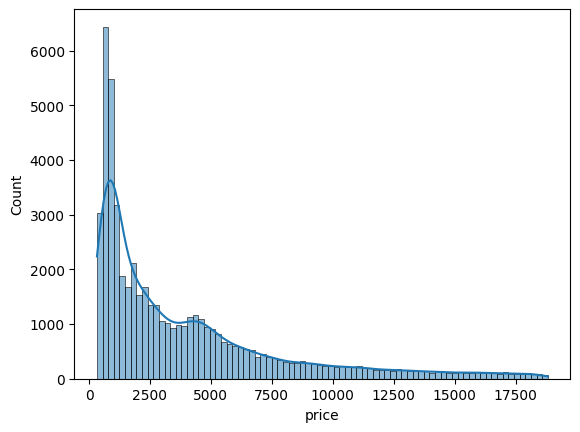

In [ ]:
sns.histplot(diamond_data['price'], kde = True)

In [ ]:
price_range = diamond_data['price'].max() - diamond_data['price'].min()
print(price_range)

18497


In [ ]:
bin_width = price_range/10
bin_width

1849.7

In [ ]:
lower_interval = int(np.floor(diamond_data['price'].min()))
upper_interval = int(np.ceil(diamond_data['price'].max()))

In [ ]:
interval_length = int(np.round(price_range/10))

In [ ]:
print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [ ]:
total_bins = [i for i in range(lower_interval,upper_interval + interval_length, interval_length)]
print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [ ]:
2757-2176

581

In [ ]:
bin_labels = ['Bin_no_' + str(i) for i in range(1, len(total_bins))]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [ ]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins = total_bins, labels = bin_labels, include_lowest = True)
diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Bin_no_2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Bin_no_2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Bin_no_2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Bin_no_2


In [ ]:
x = diamond_data.groupby('price_bins')
x.first()

,carat,cut,color,clarity,depth,table,price,x,y,z
price_bins,,,,,,,,,,
Bin_no_1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
Bin_no_2,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
Bin_no_3,0.71,Ideal,E,VVS1,61.9,55.0,4027,5.73,5.77,3.56
Bin_no_4,1.06,Ideal,E,SI1,58.8,57.0,5877,6.71,6.66,3.93
Bin_no_5,1.01,Ideal,E,VS1,61.5,57.0,7727,6.47,6.44,3.97
Bin_no_6,1.32,Ideal,G,VS2,61.1,57.0,9580,7.13,7.07,4.34
Bin_no_7,1.62,Very Good,H,VS2,59.6,59.0,11427,7.59,7.67,4.55
Bin_no_8,1.93,Very Good,I,SI1,62.8,58.0,13278,7.89,7.97,4.98
Bin_no_9,2.08,Ideal,I,SI2,62.3,56.0,15132,8.16,8.22,5.10


In [ ]:
y = diamond_data.groupby('price_bins')['price']
y.first()

price_bins
Bin_no_1       326
Bin_no_2      2757
Bin_no_3      4027
Bin_no_4      5877
Bin_no_5      7727
Bin_no_6      9580
Bin_no_7     11427
Bin_no_8     13278
Bin_no_9     15132
Bin_no_10    16985
Name: price, dtype: int64

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000')])

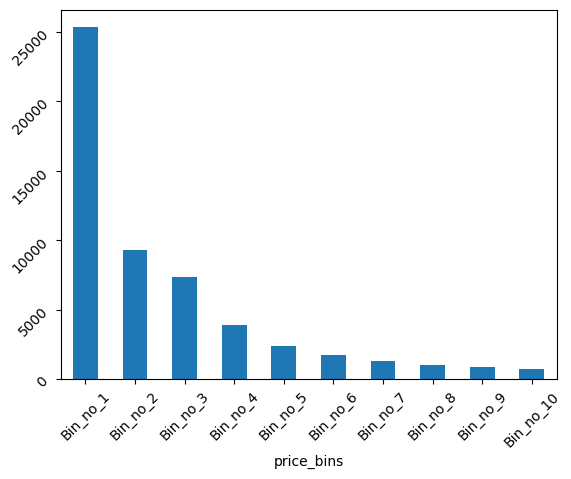

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

2. Equal Frequency Discretization

In [ ]:
discretized_price, bins = pd.qcut(diamond_data['price'], 10, labels=None, retbins= True, precision =3, duplicates = 'raise')
discretized_price

0        (325.999, 646.0]
1        (325.999, 646.0]
2        (325.999, 646.0]
3        (325.999, 646.0]
4        (325.999, 646.0]
               ...       
53935    (2401.0, 3465.0]
53936    (2401.0, 3465.0]
53937    (2401.0, 3465.0]
53938    (2401.0, 3465.0]
53939    (2401.0, 3465.0]
Name: price, Length: 53940, dtype: category
Categories (10, interval[float64, right]): [(325.999, 646.0] < (646.0, 837.0] < (837.0, 1087.0] <
                                            (1087.0, 1698.0] ... (3465.0, 4662.0] <
                                            (4662.0, 6301.2] < (6301.2, 9821.0] < (9821.0, 18823.0]]

In [ ]:
bins

array([  326. ,   646. ,   837. ,  1087. ,  1698. ,  2401. ,  3465. ,
        4662. ,  6301.2,  9821. , 18823. ])

In [ ]:
pd.concat([discretized_price, diamond_data['price']], axis = 1).head(20)

,price,price
0,"(325.999, 646.0]",326
1,"(325.999, 646.0]",326
2,"(325.999, 646.0]",327
3,"(325.999, 646.0]",334
4,"(325.999, 646.0]",335
5,"(325.999, 646.0]",336
6,"(325.999, 646.0]",336
7,"(325.999, 646.0]",337
8,"(325.999, 646.0]",337
9,"(325.999, 646.0]",338


In [ ]:
discretized_price.value_counts()

(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: price, dtype: int64

In [ ]:
bin_labels = ['Bin_no_' + str(i) for i in range(1, 11)]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [ ]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins = bins, labels = bin_labels, include_lowest = True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


<Axes: xlabel='price_bins'>

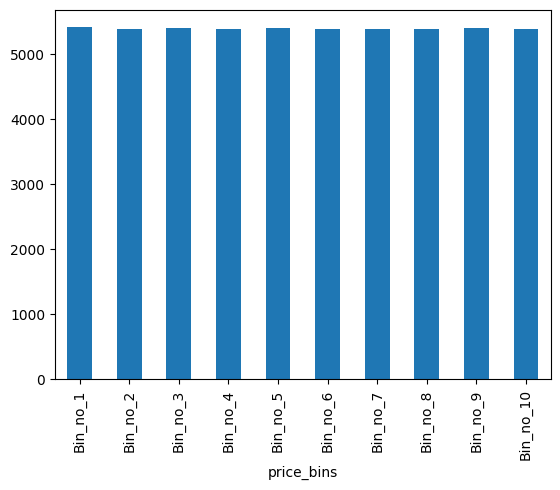

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()

3. K means discretization

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

discretization = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')    #‘ordinal’: Return the bin identifier encoded as an integer value.
discretization.fit(diamond_data[['price']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [ ]:
intervals = discretization.bin_edges_.tolist()
print(intervals)


[array([  326.        ,  1492.78643064,  2879.05730293,  4308.05906601,
        5843.59336918,  7649.12113784,  9636.73187241, 11747.84144024,
       13992.95066605, 16339.91790883, 18823.        ])]


In [ ]:
intervals = [ 326.    , 1417.67543928, 2627.50524806, 3950.3762392 ,
    5441.70606939, 7160.05893161, 9140.61465361, 11308.37609661,
    13634.55462656, 16130.22549621, 18823.    ]

In [ ]:
bin_labels = ['Bin_no_' +str(i) for i in range(1,11)]
print(bin_labels)
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=intervals, labels=bin_labels, include_lowest=True)
diamond_data.head(10)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

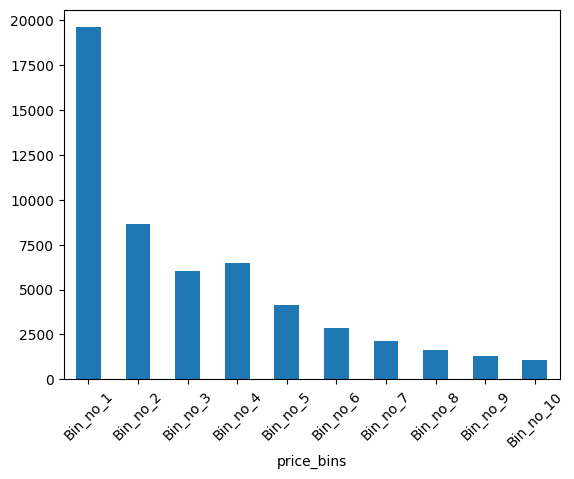

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

II. **Feature Scaling**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["age","fare","pclass"]]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [ ]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [ ]:
(22-29.699118)/14.526497             # (data_point - mean)/stdev

-0.5300051347547863

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


2. Min/Max Scaling

In [ ]:
(22 - 0.420000) / (80.000000 - 0.420000)       #(data_point - min)/(max - min)

0.2711736617240513

In [ ]:
from sklearn.preprocessing import MinMaxScaler  #very similar to standardScaler, just library name is different

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


3. Mean Normailzation


here we subtract data pt. from mean value

In [ ]:
mean_vals = titanic_data.mean(axis=0)
mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

In [ ]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

In [ ]:
titanic_data_scaled = (titanic_data - mean_vals) / range_vals

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.096747,-0.048707,0.345679
1,0.104309,0.076277,-0.654321
2,-0.046483,-0.047390,0.345679
3,0.066611,0.040786,-0.654321
4,0.066611,-0.047146,0.345679


4. Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.2750,0.014151,1.000000
1,0.4750,0.139136,0.333333
2,0.3250,0.015469,1.000000
3,0.4375,0.103644,0.333333
4,0.4375,0.015713,1.000000


5. Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

Quantile 1 is 25%, q2 is 50, q3 is 75%

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.335664,-0.312011,0.0
1,0.559441,2.461242,-2.0
2,-0.111888,-0.282777,0.0
3,0.391608,1.673732,-2.0
4,0.391608,-0.277363,0.0


**III. Transformation**

In [ ]:
titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["age","fare","pclass"]]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


1. Log transformation:

to convert skewed distribtuon to normal distribution

In [ ]:
# Select one attribute for transformation (e.g., 'fare')
attribute = 'fare'

# Log Transformation
titanic_data['log_' + attribute] = np.log1p(titanic_data[attribute])

2. Reciprocal transformation

In [ ]:
# Reciprocal Transformation
titanic_data['reciprocal_' + attribute] = 1 / (titanic_data[attribute] + 1)

3. Squared transformation

Used when all positive values are present

In [ ]:
# Square Transformation
titanic_data['square_' + attribute] = titanic_data[attribute] ** 2

4. Squared Root transformation

In [ ]:
# Square Root Transformation
titanic_data['sqrt_' + attribute] = np.sqrt(titanic_data[attribute])

5. BoxCox transformation

In [ ]:
from scipy.stats import boxcox
# Box-Cox Transformation
# Note: Box-Cox requires positive values, so we add a constant to make all values positive
titanic_data['boxcox_' + attribute], _ = boxcox(titanic_data[attribute] + 1)

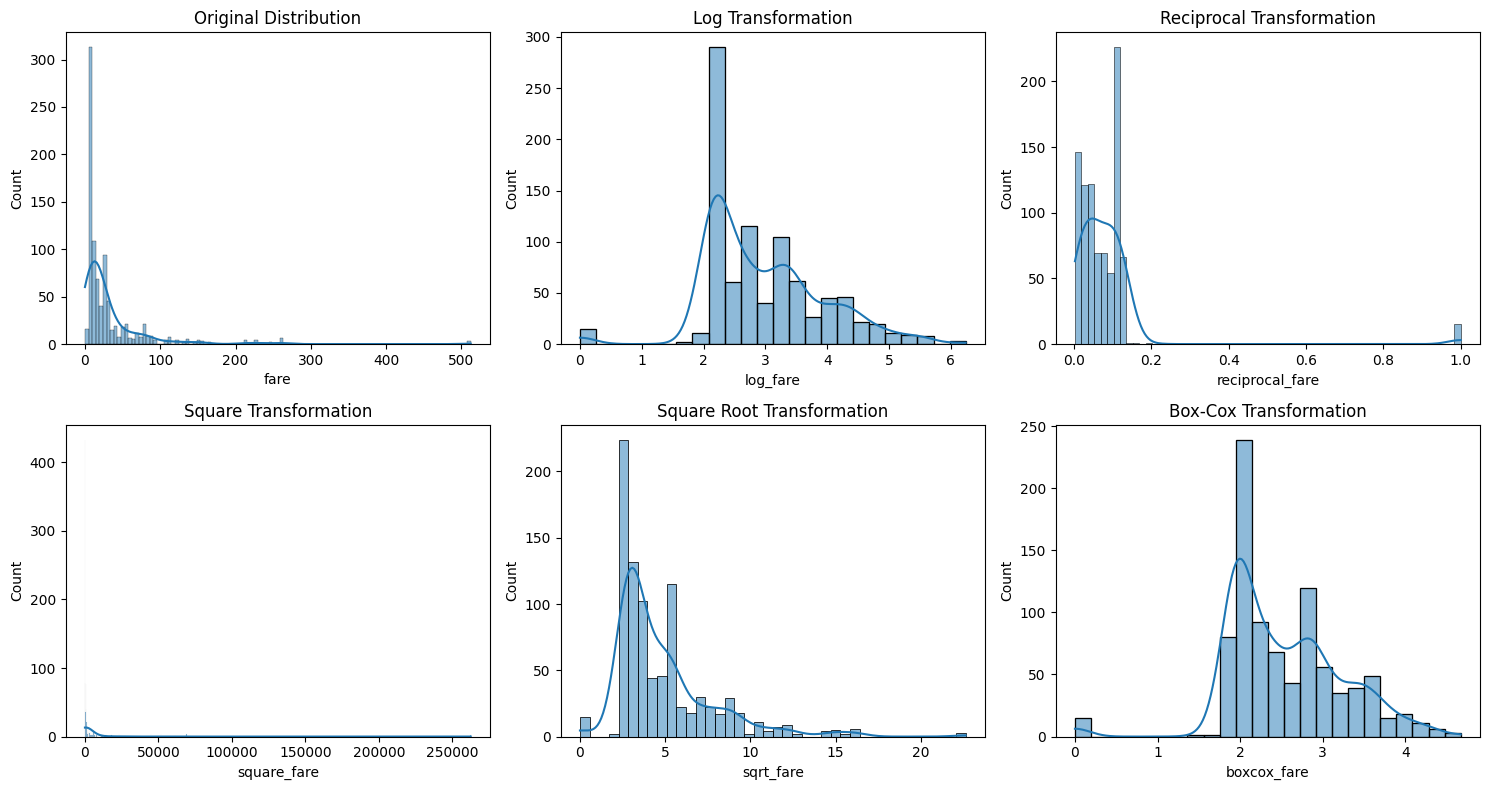

In [ ]:
# Plot the original and transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.histplot(titanic_data[attribute], kde=True, ax=axes[0, 0]).set_title('Original Distribution')
sns.histplot(titanic_data['log_' + attribute], kde=True, ax=axes[0, 1]).set_title('Log Transformation')
sns.histplot(titanic_data['reciprocal_' + attribute], kde=True, ax=axes[0, 2]).set_title('Reciprocal Transformation')
sns.histplot(titanic_data['square_' + attribute], kde=True, ax=axes[1, 0]).set_title('Square Transformation')
sns.histplot(titanic_data['sqrt_' + attribute], kde=True, ax=axes[1, 1]).set_title('Square Root Transformation')
sns.histplot(titanic_data['boxcox_' + attribute], kde=True, ax=axes[1, 2]).set_title('Box-Cox Transformation')

plt.tight_layout()
plt.show()